In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [62]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

df = pd.concat([train_data, test_data], sort=True, ignore_index=True)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## missing values, types, properties, correlation

In [63]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [64]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


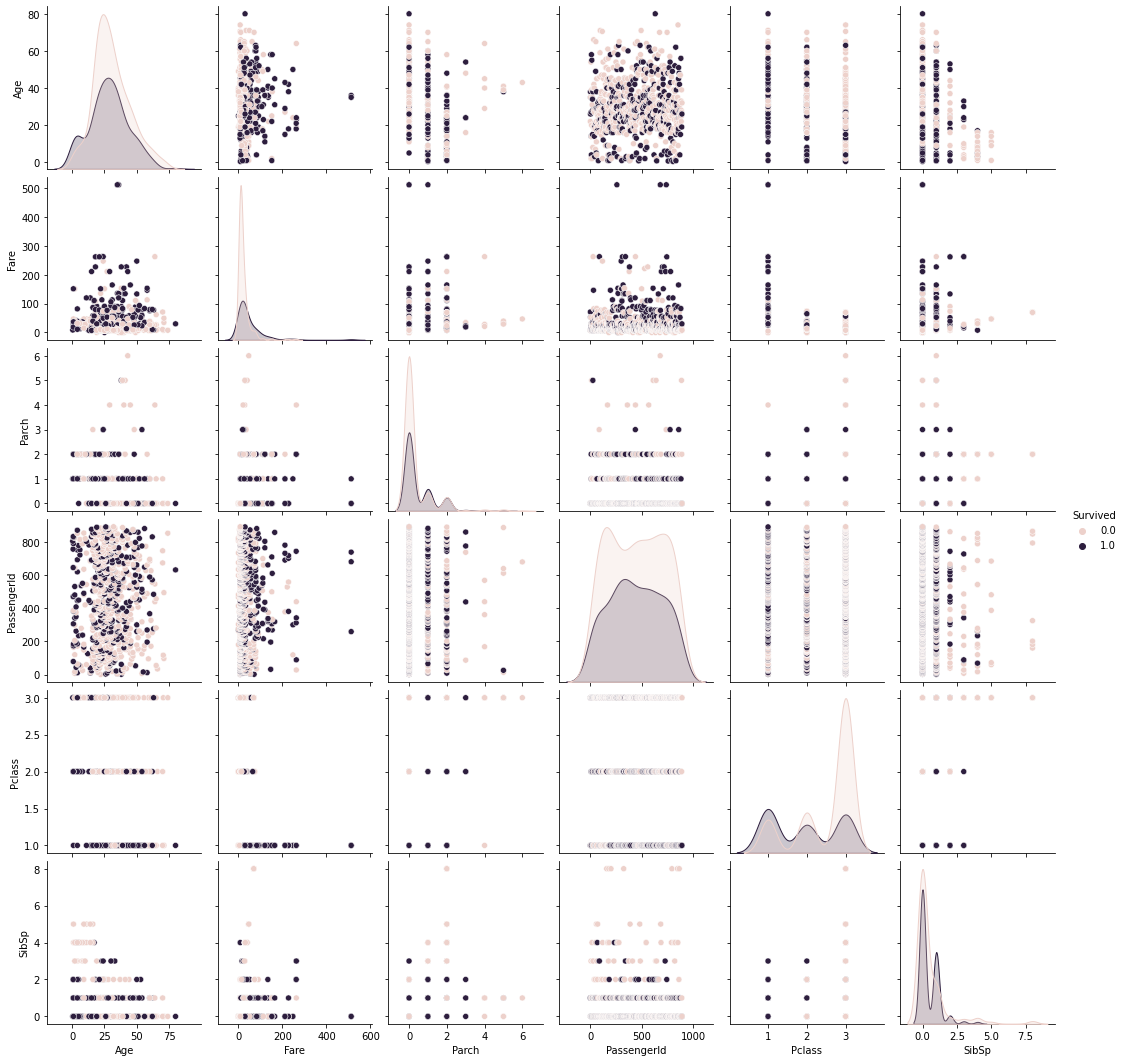

In [65]:
sns.pairplot(df, hue='Survived')

<AxesSubplot:>

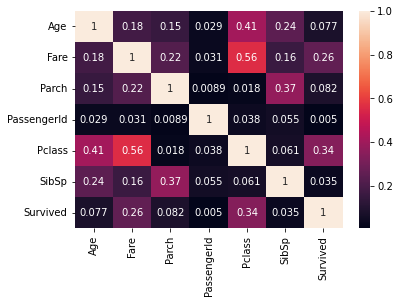

In [66]:
sns.heatmap(df.corr().abs(), annot=True)

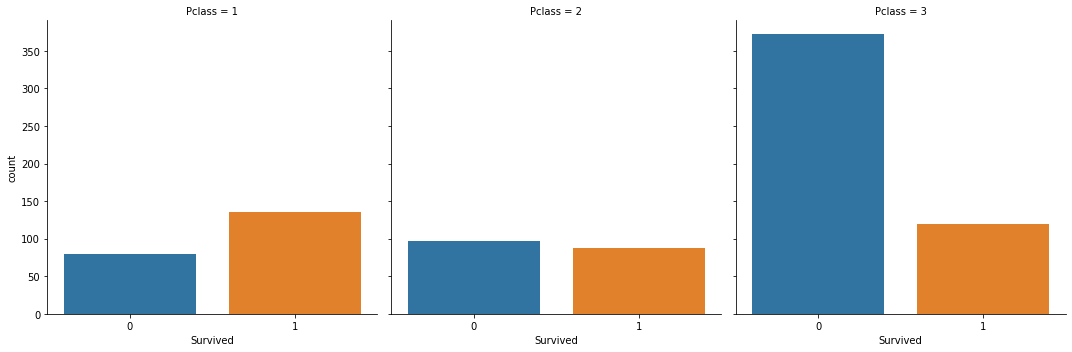

In [67]:
sns.catplot(data=train_data, col = 'Pclass', x = 'Survived', kind = 'count', col_wrap = 3)

## Filling missing values

In [68]:
# Filling missing 'Fare' value, belongs to Pclass=3
display(df[df['Fare'].isnull()==True])

avg_fare_pclass3 = df[df['Pclass']==3]['Fare'].mean()
print("Mean of 'Fare' for Pclass=3:", avg_fare_pclass3)
df['Fare'] = df['Fare'].fillna(avg_fare_pclass3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


Mean of 'Fare' for Pclass=3: 13.302888700564973


S    914
C    270
Q    123
Name: Embarked, dtype: int64


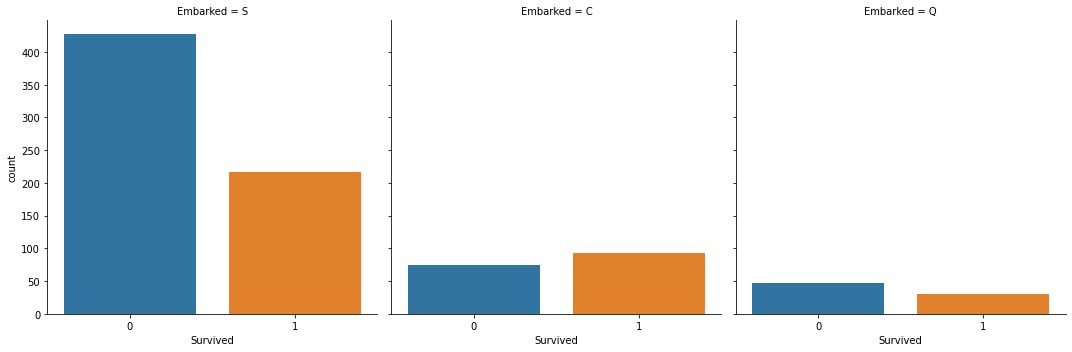

In [69]:
# Filling 'Embarked' missing 2 values, we use the most common since there isn't a clear pattern for survival
sns.catplot(data=train_data, col = 'Embarked', x = 'Survived', kind = 'count', col_wrap = 3)
print(df['Embarked'].value_counts())
df['Embarked'] = df['Embarked'].fillna('S')

#### Filling 'Age' missing values
We don't want to look further into the *Age* for now, so we'll use the median

In [70]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print(median_age)

28.0


In [71]:
df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Dropping columns

In [72]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


## Encoding categorical features

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_categorical = ["Embarked", "Sex"]

for val in features_categorical:
    df[val] = le.fit_transform(df[val])

In [74]:
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,0,3,1,1,0.0
1,38.0,0,71.2833,0,1,0,1,1.0
2,26.0,2,7.9250,0,3,0,0,1.0
3,35.0,2,53.1000,0,1,0,1,1.0
4,35.0,2,8.0500,0,3,1,0,0.0


## Split train and test dataframes again and prepare for model training

In [75]:
# We make sure that the dataframe didn't change: 'Survived' starts giving NaN values after 891 rows
df.iloc[889:892]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
889,26.0,0,30.0000,0,1,1,0,1.0
890,32.0,1,7.7500,0,3,1,0,0.0
891,34.5,1,7.8292,0,3,1,0,NaN


In [76]:
df_train = df[0:891]
df_test = df[891:]

In [77]:
y = df_train["Survived"]

X = df_train.drop(columns='Survived')
X_test = df_test.drop(columns='Survived')

#### Scaling and normalization
We should always consider scaling and normalization for our data. StandardScaler usually yields the best results.

In [78]:
from sklearn.preprocessing import StandardScaler

transformer_X = StandardScaler().fit_transform(X)
transformer_X_test = StandardScaler().fit_transform(X_test)

X = pd.DataFrame(transformer_X, columns=X.columns)
X_test = pd.DataFrame(transformer_X_test, columns=X_test.columns)

In [79]:
# Everything seems fine
display(X.head())
display(X_test.head())

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,-0.565736,0.585954,-0.502445,-0.473674,0.827377,0.737695,0.432793
1,0.663861,-1.942303,0.786845,-0.473674,-1.566107,-1.355574,0.432793
2,-0.258337,0.585954,-0.488854,-0.473674,0.827377,-1.355574,-0.474545
3,0.433312,0.585954,0.420730,-0.473674,-1.566107,-1.355574,0.432793
4,0.433312,0.585954,-0.486337,-0.473674,0.827377,0.737695,-0.474545


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,0.371062,-0.470915,-0.497354,-0.400248,0.873482,0.755929,-0.499470
1,1.358985,0.700767,-0.512219,-0.400248,0.873482,-1.322876,0.616992
2,2.544493,-0.470915,-0.464042,-0.400248,-0.315819,0.755929,-0.499470
3,-0.221692,0.700767,-0.482417,-0.400248,0.873482,0.755929,-0.499470
4,-0.616861,0.700767,-0.417434,0.619896,0.873482,-1.322876,0.616992


In [80]:
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

In [81]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import tree

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
f = df_train.drop("Survived", axis=1)
t = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(f,t,test_size=0.3,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623,), (268,))

The accuracy of the DecisionTree Classifier is 75.37
The cross validated score for Decision Tree classifier is: 78.79


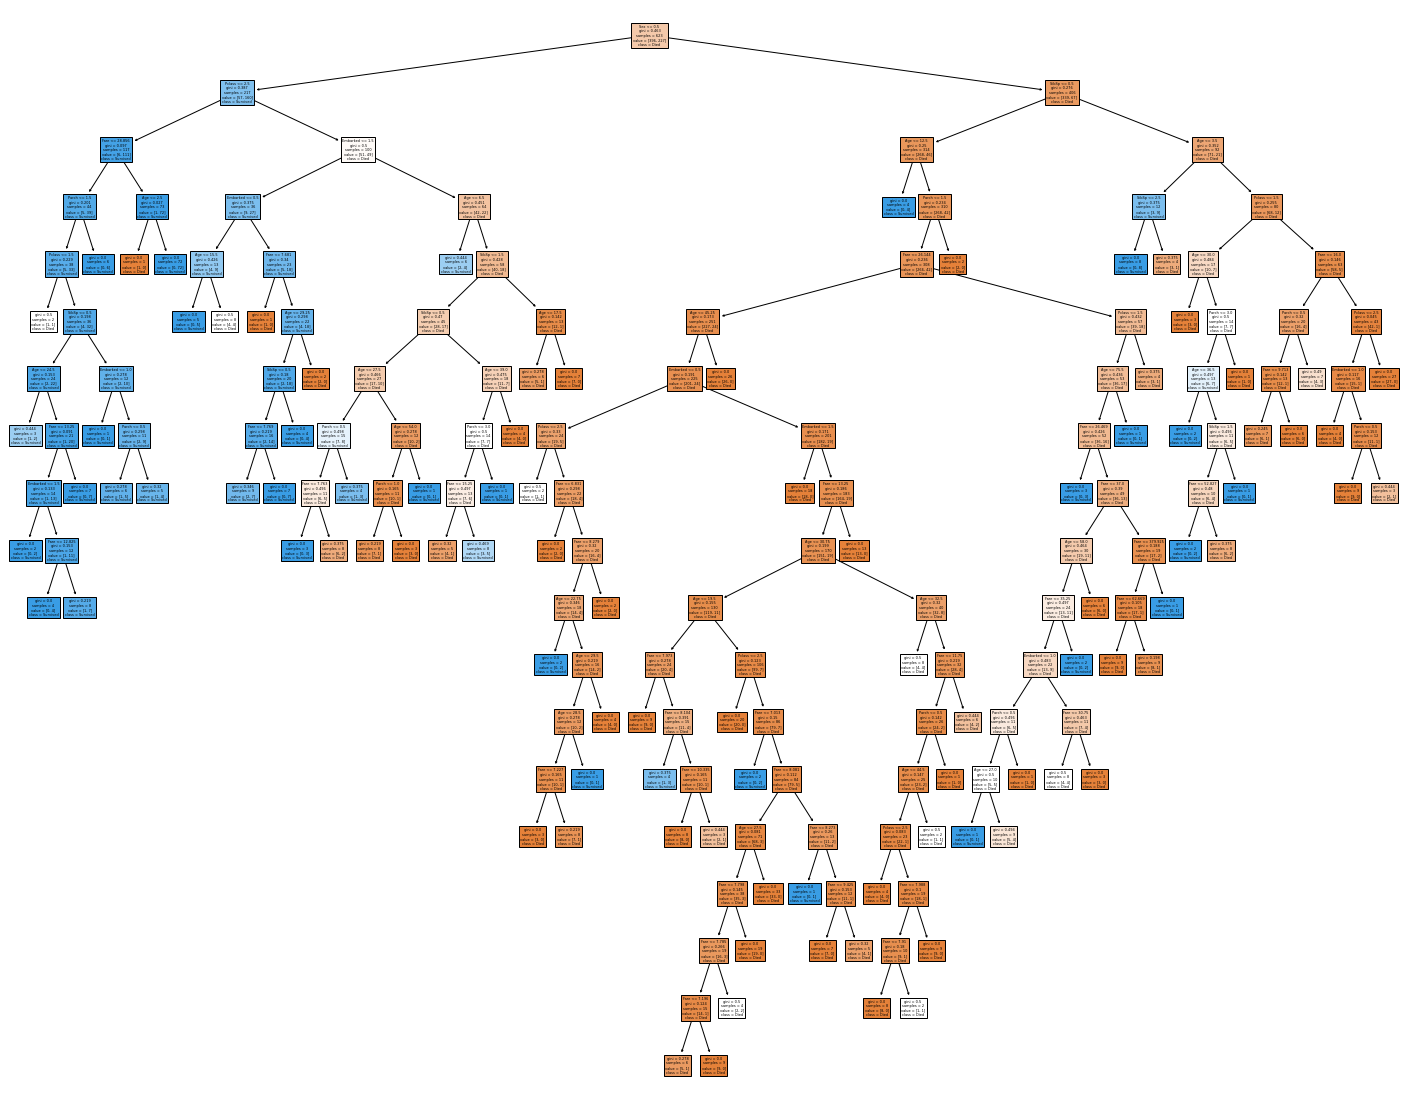

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto')
t1 = model.fit(X_train,y_train)

prediction_tree = model.predict(X_test)
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=None)
result_tree = cross_val_score(model,f,t,cv=5,scoring='accuracy')

print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    model, 
    feature_names = list(df_train.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled=True)
# y_pred = cross_val_predict(model,f,t,cv=5)
# tree.plot_tree(t1)

In [92]:
f = df_train.drop("Survived",axis=1)
t = df_train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(f,t,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [93]:
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=1000,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    n_jobs=-1)

model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=5)
result_rm=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)

The accuracy of the Random Forest Classifier is 78.73
The cross validated score for Random Forest Classifier is: 82.27


And now, we only need to export our predictions to a .csv file and submit it to see the result!
It is important to remember that our predictions should be of type 'int', not 'float'.

In [90]:
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions.astype(int)})
# output.to_csv('submission.csv', index=False)
# print("Submission successfully saved")